In [1]:
#Two-Qubit Studies
#Amitava Chakraborty - 15th Jul 2019
from qiskit import IBMQ
# Loading your IBM Q account(s)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit_textbook.tools import vector2latex, unitary2latex

u_backend = BasicAer.get_backend('unitary_simulator')
s_backend = BasicAer.get_backend('statevector_simulator')
q_backend = BasicAer.get_backend('qasm_simulator')

# Multi-Qubit States

A single qubit has two possible states $\{|0\rangle, |1\rangle\}$, similarly, two qubits have four possible states: $\{|00\rangle, |01\rangle\, |10\rangle, |11\rangle\}$

A single qubit state has two complex amplitudes - state of two qubits requires four complex amplitudes. We store these amplitudes in a 4D-vector<br>
$$ |\psi\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

The rules of measurement is
$$ p(|00\rangle) = |\langle 00 | \psi \rangle |^2 = |a_{00}|^2$$ and so on..

The normalisation condition is
$$ |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1$$
    
Now if we have two separate qubits, we describe their collective state using the tensor product:
$$ |\psi\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |\phi\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$
$$ 
|\psi\phi\rangle = |\psi\rangle \otimes |\phi\rangle = \begin{bmatrix} a_0 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \\ a_1 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} a_0 b_0 \\ a_0 b_1 \\ a_1 b_0 \\ a_1 b_1 \end{bmatrix}
$$

With these same rules, we can use the tensor product to describe the collective state of any number of qubits, say for  three qubits
$$ 
|\psi\phi\chi\rangle = \begin{bmatrix} a_0 b_0 c_0 \\ a_0 b_0 c_1 \\ a_0 b_1 c_0 \\ a_0 b_1 c_1 \\
                              a_1 b_0 c_0 \\ a_1 b_0 c_1 \\ a_1 b_1 c_0 \\ a_1 b_1 c_1 \\
              \end{bmatrix}
$$

If we have $n$ qubits, we will need to keep track of $2^n$ complex amplitudes - these vectors grow exponentially with the number of qubits. Hence quantum computers with large numbers of qubits are extremely difficult to simulate. A modern laptop can easily simulate around 20 qubits, but 100 qubits is too difficult for the largest supercomputers.

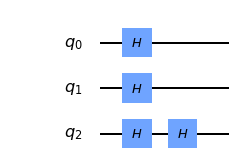

In [4]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
#qc.x(2)    
#qc.cx(1,2)
qc.h(2)
# See the circuit:
qc.draw('mpl')

Each qubit is in the state $|+\rangle$, so we should see the vector:</p>
$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

In [5]:
# The final state vector
final_state = execute(qc,s_backend).result().get_statevector()

vector2latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

### Single Qubit Gates on Multi-Qubit Statevectors

An X-gate is 
$$
X = \begin{bmatrix} 0 && 1 \\ 1 && 0 \end{bmatrix}
$$
It acts on the state $|0\rangle$ as
$$
X|0\rangle = \begin{bmatrix} 0 && 1 \\ 1 && 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix}
$$

Now, for a single qubit gate like X-gate in a multi-qubit arrangement we use the tensor product to calculate multi-qubit statevectors

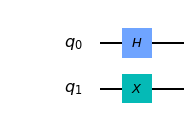

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

We can represent the simultaneous operations (H &amp; X) using their tensor product
$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

The operation looks like this:</p>
$$
X\otimes H = \begin{bmatrix} 0 && 1 \\ 1 && 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 && 1 \\ 1 && -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 && 1 \\ 1 && -1 \end{bmatrix}
              && 1 \times \begin{bmatrix} 1 && 1 \\ 1 && -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 && 1 \\ 1 && -1 \end{bmatrix}
              && 0 \times \begin{bmatrix} 1 && 1 \\ 1 && -1 \end{bmatrix}
\end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 && 0 && 1 && 1 \\
                0 && 0 && 1 && -1 \\
                1 && 1 && 0 && 0 \\
                1 && -1 && 0 && 0 \\
\end{bmatrix}
$$<p>Which we can then apply to our 4D statevector $|q_1 q_0\rangle$. 
    
There is an easier way,
$$
X\otimes H = 
\begin{bmatrix} 0 && H \\
               H && 0\\
\end{bmatrix}
$$

We use Qiskit’s <code>unitary_simulator</code> to calculate such matrices - The unitary simulator multiplies all the gates in the circuit and compiles a single unitary matrix that workd as the entire quantum circuit.

In [7]:
unitary = execute(qc,u_backend).result().get_unitary()
unitary2latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

In [8]:
#If we apply a gate to only one qubit at a time, we must imagine an Identity Gate on the other qubits
qc = QuantumCircuit(2)
qc.x(1)
# Simulate the unitary
unitary = execute(qc,u_backend).result().get_unitary()
# Display the results:
unitary2latex(unitary, pretext="\\text{Circuit = }X \\otimes I = \\begin{bmatrix} 0 && 1 \\\ 1 && 0 \\end{bmatrix} \\otimes \\begin{bmatrix} I && 0 \\\ 0 && I \\end{bmatrix} = ")

<IPython.core.display.Math object>

### CNOT-gate
It is a conditional gate - performs an X-gate on the second (target) qubit, if the the first (control) qubit is $|1\rangle$.

When the qubits are not in superposition of $|0\rangle$ or $|1\rangle$, it looks like the following 4D-statevector matrix
$$
\text{CNOT} = \begin{bmatrix} 1 && 0 && 0 && 0 \\
                              0 && 0 && 0 && 1 \\
                              0 && 0 && 1 && 0 \\
                              0 && 1 && 0 && 0 \\
              \end{bmatrix}
$$

This matrix swaps the amplitudes of $|01\rangle$ and $|11\rangle$ in our statevector:</p>
$$ 
|\psi\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|\psi\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

### CNOT in superposition

We will put one qubit in the state $|+\rangle$

In [148]:
qc = QuantumCircuit(2,2)
# Apply H-gate to the first:
qc.h(0)
# Let's see the result:
final_state = execute(qc,s_backend).result().get_statevector()
vector2latex(final_state, pretext="\\text{Statevector = }|0\\rangle \\otimes |{+}\\rangle = |0{+}\\rangle = \\tfrac{1}{\\sqrt{2}}(|00\\rangle + |01\\rangle) = ")

<IPython.core.display.Math object>

In [149]:
#And let’s see what happens when we apply the CNOT gate:
# Apply a CNOT:
qc.cx(0,1)

# Let's see the result:
final_state = execute(qc,s_backend).result().get_statevector()
vector2latex(final_state, pretext="\\text{Statevector = }\\text{CNOT}|0{+}\\rangle = \\tfrac{1}{\\sqrt{2}}(|00\\rangle + |11\\rangle) = ")

<IPython.core.display.Math object>

### Entangled States

The above state, thus created, is an <em>entangled state</em>
$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

This is also known as a <em>Bell</em> state. Such a state have 50% probabilities of being measured in the state $|00\rangle$ and state $|11\rangle$. It has a <strong>0%</strong> chance of being measured in the states $|01\rangle$ or $|10\rangle$.

In [152]:
#qc.measure([0,1],[0,1])
#qc.measure([0],[0])
qc.measure([1],[1])
qc.draw()

┌───┐           
q_0: ┤ H ├──■────────
     └───┘┌─┴─┐┌─┐┌─┐
q_1: ─────┤ X ├┤M├┤M├
          └───┘└╥┘└╥┘
c_0: ═══════════╬══╬═
                ║  ║ 
c_1: ═══════════╩══╩═

In [151]:
results = execute(qc,q_backend).result().get_counts()
#plot_histogram(results)
print(results)

{'10': 521, '00': 503}


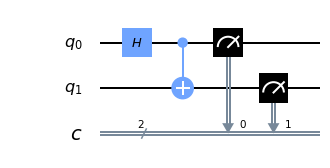

In [142]:
qc.measure([1],[1])
qc.draw('mpl')

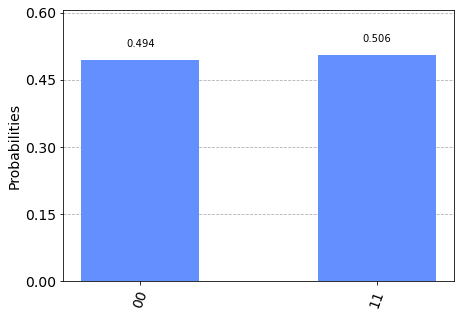

In [90]:
results = execute(qc,q_backend).result().get_counts()
plot_histogram(results)

The qubits are in superposition - once we measure one of them, it will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state $|1\rangle$, the collective state of our qubits changes
$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle
$$

Since the measurement result is random, we can <strong>not</strong> use entangled states to communicate in this way. This is the result of a theorem known as the <em>no-communication theorem</em>). 

There is a common misconception that we could use entangled states to communicate faster than the speed of light - it is not true.

## GHZ state : Make a quantum circuit for the GHZ state.

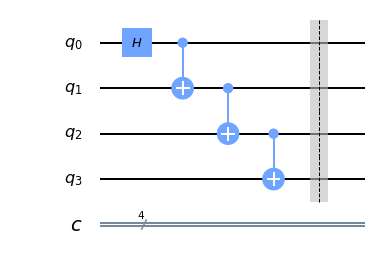

In [153]:
num_qubits =4
q = QuantumRegister(num_qubits, "q")
c = ClassicalRegister(num_qubits, "c")
qc = QuantumCircuit(q, c, name='ghz')

# Create a GHZ state
qc.h(q[0])
for i in range(num_qubits-1):
    qc.cx(q[i], q[i+1])
# Insert a barrier before measurement
qc.barrier()

qc.draw('mpl')

In [154]:
final_state = execute(qc,s_backend).result().get_statevector()
vector2latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [155]:
# Measure all of the qubits in the standard basis
for i in range(num_qubits):
    qc.measure(q[i], c[i])

In [156]:
job = execute(qc, q_backend, shots=1024)
result = job.result()
print('Qasm simulator : ')
print(result.get_counts(qc))

Qasm simulator : 
{'1111': 560, '0000': 464}


### Entangled State with the control qubit in superposition

Now, in this same setup of creating entangled state of two qubits by making the state $|+\rangle$:</p> as the control qubit in 
$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

We will put the second qubit in superposition

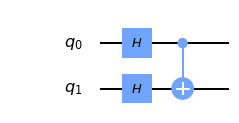

In [157]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw('mpl')

In [10]:
# Let's see the result
final_state = execute(qc,s_backend).result().get_statevector()

vector2latex(final_state, pretext="\\text{Statevector} = CNOT |{+}{+}\\rangle = CNOT(\\tfrac{1}{2}(|00\\rangle + |01\\rangle + |10\\rangle + |11\\rangle)) = ", precision=1)

<IPython.core.display.Math object>

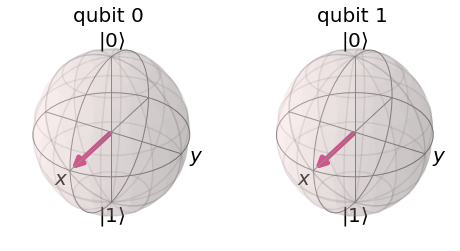

In [8]:
plot_bloch_multivector(final_state)

Actually CNOT acted on the state $|{+}{+}\rangle$, given as,
$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

Here also, CNOT simply swaps the amplitudes of $|01\rangle$ and $|11\rangle$ but we see no change in the results.

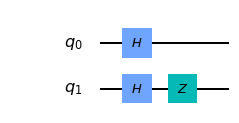

In [158]:
#Now we shall add a negative phase to the target qubit using a Z operator on qubit 1
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(1)
qc.draw('mpl')

In [159]:
# Let's see the result
final_state = execute(qc,s_backend).result().get_statevector()

vector2latex(final_state, pretext="\\text{Statevector} = |{-}{+}\\rangle = \\tfrac{1}{2}(|00\\rangle + |01\\rangle - |10\\rangle - |11\\rangle) = ", precision=1)

<IPython.core.display.Math object>

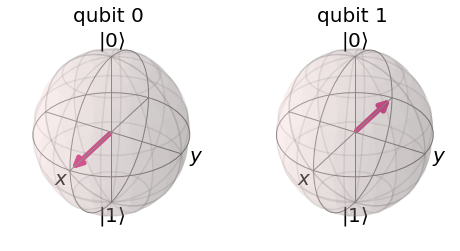

In [160]:
plot_bloch_multivector(final_state)

When CNOT acts on this state, the amplitudes of $|01\rangle$ and $|11\rangle$ are swaped, resulting in the state
$$
\text{CNOT}|{-}{+}\rangle  = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle)   = |{-}{-}\rangle
$$
Hence it affects the state of the <em>control</em> qubit while leaving the state of the <em>target</em> qubit unchanged

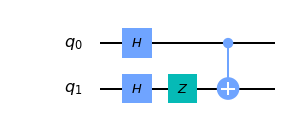

In [161]:
qc.cx(0,1)
qc.draw('mpl')

In [162]:
# Let's see the result
final_state = execute(qc,s_backend).result().get_statevector()

vector2latex(final_state, pretext="\\text{Statevector} = CNOT |{-}{+}\\rangle = CNOT(\\tfrac{1}{2}(|00\\rangle + |01\\rangle - |10\\rangle - |11\\rangle)) = ", precision=1)

<IPython.core.display.Math object>

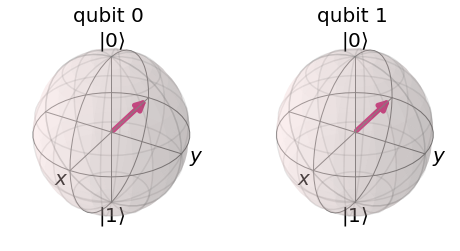

In [96]:
plot_bloch_multivector(final_state)

### Circuit Equivalence

H-gate transforms $|{+}\rangle \rightarrow |0\rangle$ and $|{-}\rangle \rightarrow |1\rangle$
If we wrap a CNOT in H-gates, it is equivalent of a CNOT acting in the opposite direction. To understand this we create two circuits 1 and 2 to implement the two kinds of gate formation.

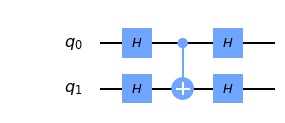

<IPython.core.display.Math object>

In [163]:
#CIrcuit 1
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw('mpl'))

unitary = execute(qc,u_backend).result().get_unitary()
unitary2latex(unitary, pretext="\\text{Unitary <CNOT|++>|++> = }\n")

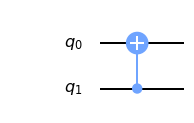

<IPython.core.display.Math object>

In [164]:
#Circuit 2
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw('mpl'))
unitary = execute(qc,u_backend).result().get_unitary()
unitary2latex(unitary, pretext="\\text{Unitary  = }\n")

## Phase Kickback

This is an example of <em>kickback</em> (or, <em>phase kickback</em> ) which is very important and is used in almost every quantum algorithm. 

Kickback is where <u>the global phase added by a gate to a qubit is ‘kicked back’ into <em>a different qubit</em> via a controlled operation</u>. 

For example,<br> 
a) <b> Global Phase</b> : Performing an X operation on a $|{-}\rangle$ qubit gives it the global phase $-1$
$$
X|{-}\rangle = -|{-}\rangle
$$

And a global phase is unobservable.

In [168]:
qc = QuantumCircuit(2,2)
# Initialise the qubit to a |-> state
qc.u3(3*pi/2,0,0,0)
#qc.h(0)
# Perform an X operation
qc.x(0)
qc.draw('mpl')
statevector = execute(qc,s_backend).result().get_statevector()
vector2latex(statevector, pretext="\\text{|->  = }\n")

<IPython.core.display.Math object>

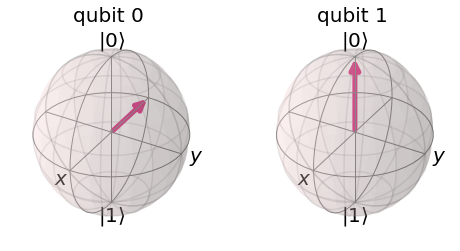

In [169]:
plot_bloch_multivector(statevector)

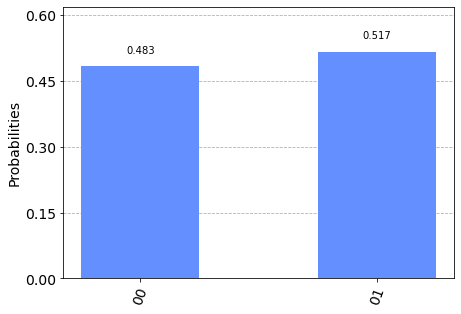

In [170]:
qc.measure(0,0)
counts = execute(qc, q_backend, shots=2048).result().get_counts()
plot_histogram(counts)

Now when our control qubit is in either $|0\rangle$ or $|1\rangle$, this phase affects the whole state, however it is a global phase and is thus unobservable
$$
\begin{aligned}
\text{CNOT}|{-}0\rangle = |{-}\rangle \otimes |0\rangle \\
                        = |{-}0\rangle \\
                        \quad \\
\text{CNOT}|{-}1\rangle = X|{-}\rangle \otimes |1\rangle \\
                        = -|{-}\rangle \otimes |1\rangle \\
                        = -|{-}1\rangle \\
\end{aligned}
$$

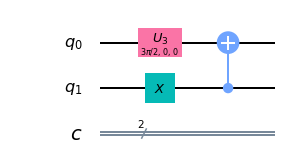

In [171]:
qc = QuantumCircuit(2,2)
# Initialise the qubit to a |-> state
qc.u3(3*pi/2,0,0,0)
qc.x(1)
# CNOT - q1 is the control qubit
qc.cx(1,0)
qc.draw('mpl')

In [172]:
statevector = execute(qc,s_backend).result().get_statevector()
vector2latex(statevector, pretext="\\text{State  = }\n")

<IPython.core.display.Math object>

Now when this control qubit is in superposition, this global phase applies to the target qubit only when the target qubit is in the state $|1\rangle$, and this adds a relative phase to our control qubit
$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle = \tfrac{1}{\sqrt{2}}(\text{CNOT}|{-}0\rangle + \text{CNOT}|{-}1\rangle) \\
\text{CNOT}|{-}{+}\rangle = \tfrac{1}{\sqrt{2}}(|{-}0\rangle + X|{-}1\rangle) \\
\text{CNOT}|{-}{+}\rangle = \tfrac{1}{\sqrt{2}}(|{-}0\rangle -|{-}1\rangle) \\
\end{aligned}
$$<p>This can then be written as the two separable qubit states:</p>
$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle = |{-}\rangle \otimes \tfrac{1}{\sqrt{2}}(|{0}\rangle - |1\rangle )\\
\text{CNOT}|{-}{+}\rangle = |{-}{-}\rangle \\
\end{aligned}
$$

Wrapping the CNOT in H-gates transforms the qubits from the computational basis to the $(|+\rangle, |-\rangle)$ basis, where we see this effect. This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits. We can use this identity to overcome this problem and allow CNOTs in both directions.

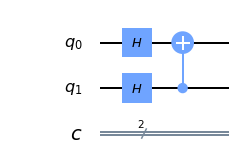

In [115]:
qc = QuantumCircuit(2,2)
# Initialise the qubit to a |-> state
qc.h(0)
qc.h(1)
# CNOT - q1 is the control qubit
qc.cx(1,0)
#qc.h(0)
#qc.h(1)

qc.draw('mpl')

In [117]:
statevector = execute(qc,s_backend).result().get_statevector()
vector2latex(statevector, pretext="\\text{State  = }\n")

<IPython.core.display.Math object>

### Phase Kickback with Controlled S-Gate or Controlled-T gate

The unitary matrices for S-gate and T-gate are
$$
\text{S} = 
\begin{bmatrix}
1 && 0 \\
0 && e^{i\pi/2}\\
\end{bmatrix}
$$ $$
\text{T} = 
\begin{bmatrix}
1 && 0 \\
0 && e^{i\pi/4}\\
\end{bmatrix}
$$

Their controlled counterparts gate have the unitaries as
$$
\text{Controlled-S} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/2}\\
\end{bmatrix}
$$
$$
\text{Controlled-T} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix}
$$

More generally, the rule to come up with the unitary matrix of any controlled-U operation
$$
\begin{aligned}
\text{U} & = 
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & = 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}
$$<p>Or, using Qiskit's qubit ordering:</p>
$$
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}
$$

If we apply S-gate to a qubit in the state $|1\rangle$, we add a global phase of $e^{i\pi/2}$ to this qubit
$$
S|1\rangle = e^{i\pi/2}|1\rangle
$$
Such a <em>global phase</em> is unobservable, but if we control this operation using another qubit in the $|{+}\rangle$ state, the phase is kicked-back and this changes the <em>relative phase</em> in our control qubit
$$
\begin{aligned}
|1{+}\rangle  = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
 = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
 \\
\text{Ctrl-S}|1{+}\rangle = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/2}|11\rangle) \\
 \\
\text{Ctrl-S}|1{+}\rangle = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/2}|1\rangle)
\end{aligned}
$$

This has the effect of rotating our control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged.

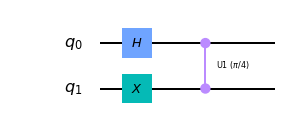

In [173]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cu1(pi/4,0,1)
qc.draw('mpl')

In [117]:
unitary = execute(qc,u_backend).result().get_unitary()
unitary2latex(unitary, pretext="\\text{Controlled-S} = \n")

<IPython.core.display.Math object>

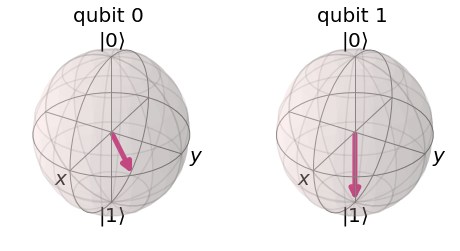

In [118]:
final_state = execute(qc,s_backend).result().get_statevector()
plot_bloch_multivector(final_state)

We can see the rightmost qubit has been rotated by $\pi/2$ around the Z-axis of the Bloch sphere as expected.